# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>

In this second notebook we analyse the concepts of Monte Carlo evaluations of the integrals, of importance sampling and of stochastic processes. In particular, in the first exercise we want to compute a monodimensional integral using both, a sampling of a uniform distribution in $[0,1)$ and an importance sampling. The results are shown using again the blocking method that we already used in the first notebook. In the second exercise we focus on the simulation of a random walk both, on a cubic lattice (discrete) and in the continuum.

As in the previous notebook, we will use the blocking method in order to estimate the uncertanties. For this reason we define some function that will be useful in the whole notebook.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import re
from matplotlib.pyplot import figure
from scipy.optimize import curve_fit

def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return np.sqrt((AV2 - AV**2)/n)


def observable(data):
    sum_prog = 0.
    sum2_prog = 0.
    val = np.zeros((len(data), 2))
    for i in range(len(data)):
        sum_prog = sum_prog + data[i]
        sum2_prog = sum2_prog + data[i]*data[i]
        ave = sum_prog / (i+1)
        ave2 = sum2_prog / (i+1)
        val[i, 0] = ave
        val[i, 1] = error(ave,ave2,i)
    return val   

### Exercise 02.1

In particular, in the first exercise we want to compute the following 1D integral via Monte Carlo:
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1.$$
We firstly sample a uniform distribution in $[0,1)$ and, called $g(x)$ the integrating function, we use the method of the mean, exploiting $\langle g(x_i) \rangle$ as an estimate of the value of the integral $I$. This brings to a result with wide uncertainties, so we decide to improve our computation using the **importance sampling**, which brings to a result with smaller uncertainties.

#### Method of the mean - uniform sampling

In [2]:
#Get information from file about the pseudo random generation
file = open("data/info_ex2.1.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/info_ex2.1.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)

#Read data from file
data = np.loadtxt("data/ex2.1.dat")

Number of blocks: 100

Number of throws: 1000000

Number of throws per block: 10000



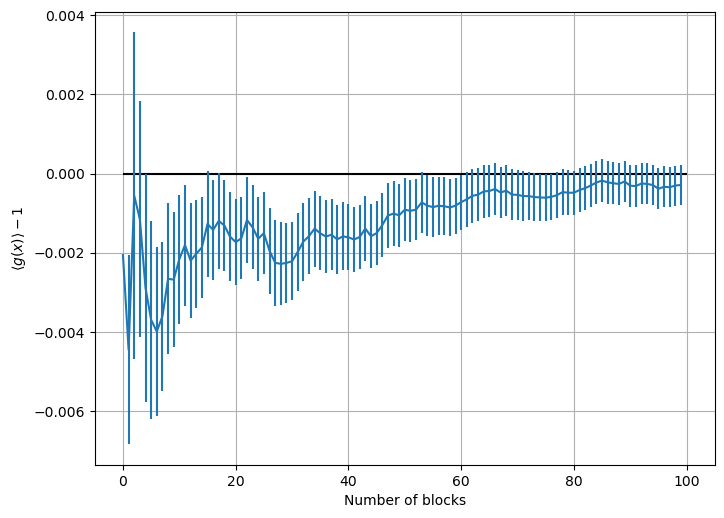

In [3]:
x = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y = observable(data[:,0])
          
figure(figsize=(8, 6), dpi=100)
plt.hlines(0,0,100, color = "black")
plt.errorbar(x,y[:,0]-1,yerr=y[:,1])
plt.xlabel(r"Number of blocks")
plt.ylabel(r"$\langle g(x) \rangle -1$")
plt.grid(True)
plt.show()

In the plot above we show the trend of the estimate of the integral as a function of the number of blocks. In particular, we obtain: $$I = 0.9997 \pm 0.0005$$
which is in perfect agreement with the theory.

Then, we show the estimate for the variance $\sigma^2_{I}$ of the integral value $I$.

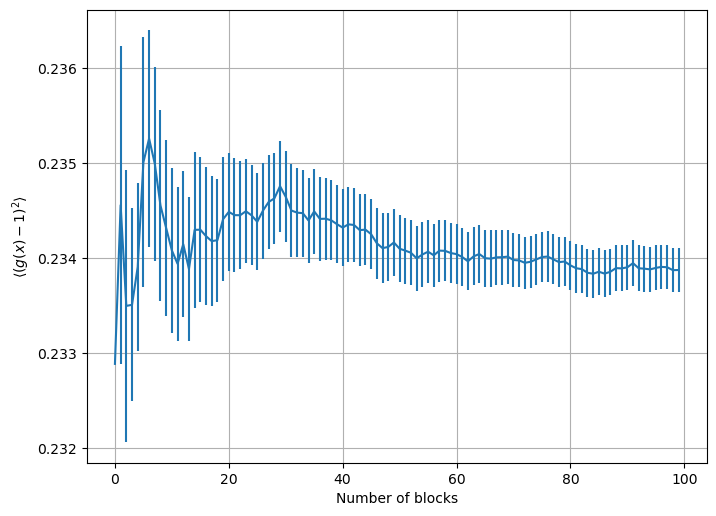

In [4]:
x = np.arange(int(s[0])) 
# build the observables, i.e. the averages on each block
y = observable(data[:,1])

figure(figsize=(8, 6), dpi=100)
plt.errorbar(x,y[:,0],yerr=y[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle(g(x)-1)^2\rangle$")
plt.grid(True)
plt.show()

From this estimate we obtain: $$ \sigma^2_{I} = 0.2339 \pm 0.0002.$$

#### Importance sampling 

We can obtain a more precise value if we resort to the importance sampling. In particular, instead of sampling a uniform distribution in $[0,1)$, we sample a distribution more similar to the integrating function. In this regard, we do the Taylor's expansion of the integrating function $g(x) = \frac{\pi}{2}\cos(\pi x/2)$ in the neighborhood of $x = 1$. Thus, we obtain: $$g(x) = - \frac{\pi^2}{4}(x - 1)+ o ( (x - 1)^2 ).$$
We expand the function in the neighborhood of $x=1$ because the importance sampling has a drowback, which is that it is difficult to apply where the function changes sign. Being the integrating function positive in $[0,1]$, we cannot decide to expand the latter in the neighborhood of $x=0$ since the term of the first order would be null and the term of the second order would be negative. 
Now, we want to use the result of the expansion as probability distribution, which however will have to respect the constraint $\int_0^1 g(x) dx = 1$. So: $$\int_0^1- \frac{\pi^2}{4}(x - 1) dx = \frac{\pi^2}{8} \, \, \, \Rightarrow \, \, \, p(x)= 2 (1 - x)$$
Clearly, the integral can't change, thus we are now computing the following integral: $$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = \int_0^1 2 (1 - x) \frac{\pi}{2}\frac{\cos(\pi x/2)}{2 (1 - x)} dx ,$$ where $\frac{\pi}{2}\frac{\cos(\pi x/2)}{2 (1 - x)}$ is the new integrating function.
Now, $p(x)$ is the distribution we want to follow in generating the random number. In order to do that, we resort to the transformation of the cumulative: $$F_x(x) = \int_0^x  2 (1 - x') \, d x'=2x - x^2 $$ and so we obtain the expression for the random number to be generated: $$x = 1 - \sqrt{1-y}, $$ where $y$ is supposed to be a random number in \[0, 1)</font>.

Once the random number is generated according to the specific $p(x)$, we evaluate the mean of the new $g(x)$ as before.

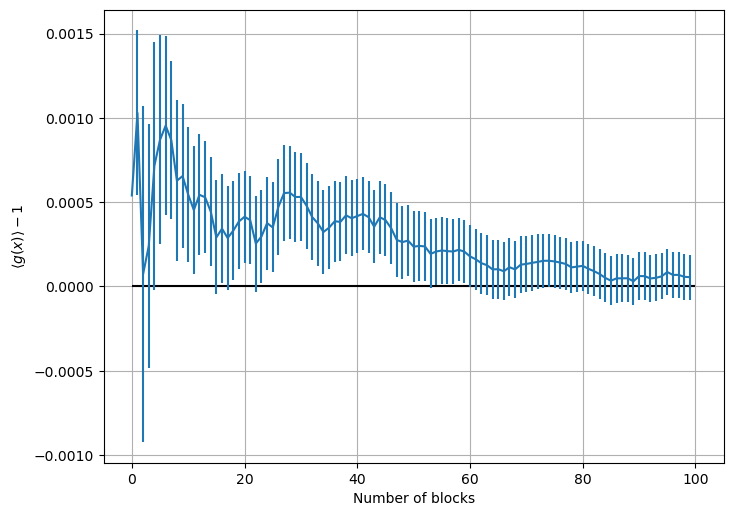

In [5]:
x_imp = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y_imp = observable(data[:,2])
          
figure(figsize=(8, 6), dpi=100)
plt.hlines(0,0,100, color = "black")
plt.errorbar(x_imp,y_imp[:,0]-1,yerr=y_imp[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle g(x) \rangle -1$")
plt.grid(True)
plt.show()

In the plot above we show the trend of the estimate of the integral as a function of the number of blocks. In particular, we obtain: $$I = 1.0000 \pm 0.0001$$
which is in perfect agreement with the theory.

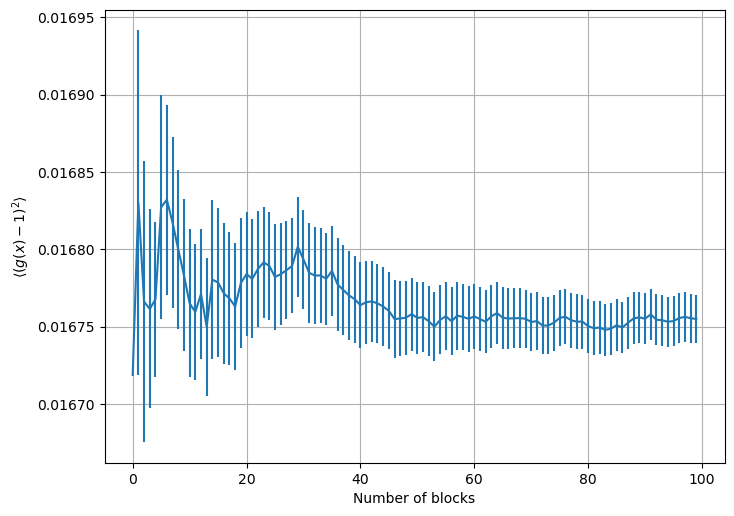

In [6]:
x_imp = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y_imp = observable(data[:,3])

figure(figsize=(8, 6), dpi=100)
plt.errorbar(x_imp,y_imp[:,0],yerr=y_imp[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle(g(x)-1)^2\rangle$")
plt.grid(True)
plt.show()

As we can see, the variance is reduced with respect to the former estimate: $$\sigma^2_{I} = 0.01675 \pm 0.00002.$$

We can also show the estimates of the value of $I$ in the same plot in order to have a sudden comprehension of the uncertainties differences.


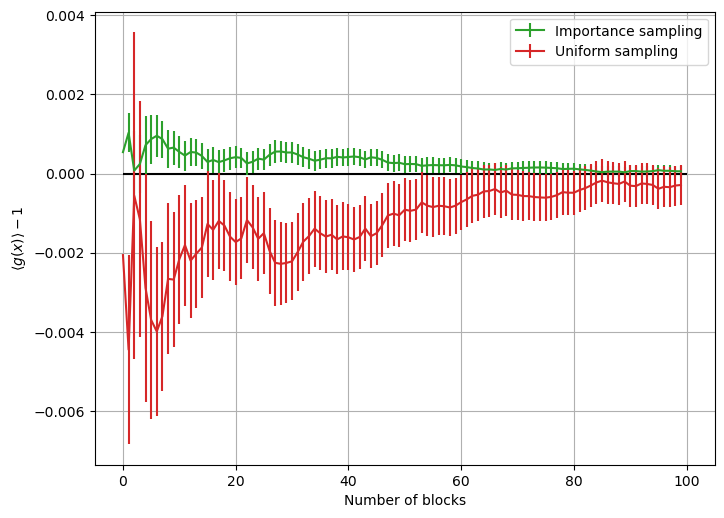

In [7]:
x = np.arange(int(s[0]))
# build the observables, i.e. the averages on each block
y_imp = observable(data[:,2])
y = observable(data[:,0])
          
figure(figsize=(8, 6), dpi=100)
plt.hlines(0,0,100, color = "black")
plt.errorbar(x,y_imp[:,0]-1,yerr=y_imp[:,1], label = "Importance sampling",  color = "C2")
plt.errorbar(x,y[:,0]-1,yerr=y[:,1], label = "Uniform sampling", color = "C3")
plt.xlabel("Number of blocks")
plt.ylabel(r"$\langle g(x) \rangle -1$")
plt.grid(True)
plt.legend()
plt.show()

### Exercise 02.2

In the second exercise we face up to the simulation of a 3D Random Walk ($RW$) both, on a cubic lattice (discrete case: the position of the walker belongs to $\mathbb{Z}^3$) and in the continuum (the position is in $\mathbb{R}^3$). The technique is always the same: we analyse $10^4$ random walks of 100 steps each divided in 100 blocks in order to calculate $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$.

Random Walks are simulated with a step lenght $a=1$ and a time between steps $\tau = 1$ .
On the lattice the walker is forced to walk on one of the three axes, while in the continuum the walker can choose any direction to move along.

#### Discrete case 

In the discrete case the strategy is the following.

Since the walker is on a cubic lattice we have to make two choices:

1. generate a random integer variable in $[0,3)$ which indicates the direction of the motion (one of the three axes).
2. Generate a random variable in $(-1,1)$ which indicates the verse of the motion (if positive the walker will move forward, otherwise it will move backward).
3. Accumulate the steps in a 3D vector and, for each step, store the value of the vector norm. 

In [8]:
#Get information from file about the pseudo random generation
file = open("data/info_ex2.2.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/info_ex2.2.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file) #find the numbers in the file and store them in a vector s


Number of blocks: 100

Number of step per walk: 100

Number of walks per block: 100



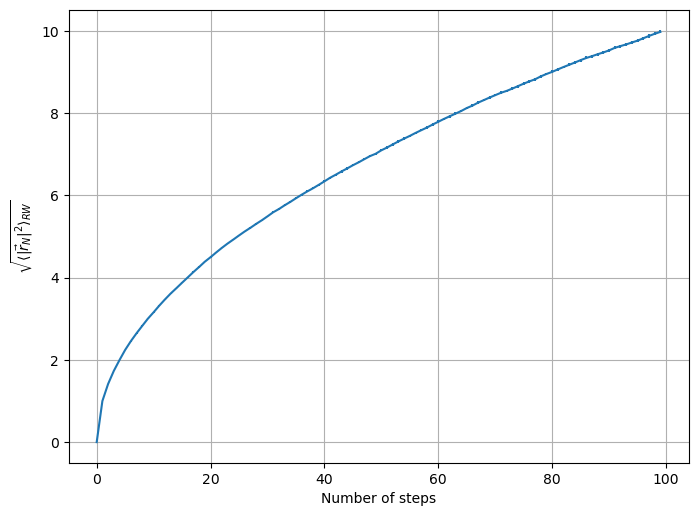

In [9]:
r_ave_disc,r_err_disc=np.loadtxt("data/ex2.2_new.dat", usecols=(0,1), dtype="float,float", unpack=True)

steps = range(100);
figure(figsize=(8, 6), dpi=100)

plt.errorbar(steps,r_ave_disc,yerr=r_err_disc)
plt.xlabel("Number of steps")
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.grid(True)

plt.show()

In the plot above we show the distance of the walker from the origin as a function of the number of steps. In particular, after $100$ steps, we get: $$\sqrt{\langle |\vec{r}_N|^2 \rangle}_{disc} = 9.97 \pm 0.04$$

#### Continuous case

In the continuous case the walker can occupy any point of $\mathbb{R}^3$ and choose any direction to move along. In particular, in order to generate randomly a direction and a verse, we resort to a sampling of $\phi \in (0,2\pi)$ and $\theta\in (0,\pi)$. The latter is sampled with $\arccos(x)$, where $x$ is a random number between -1 and 1.
Also in this case we consider $10000$ random walks of $100$ steps each and divided in $100$ blocks.


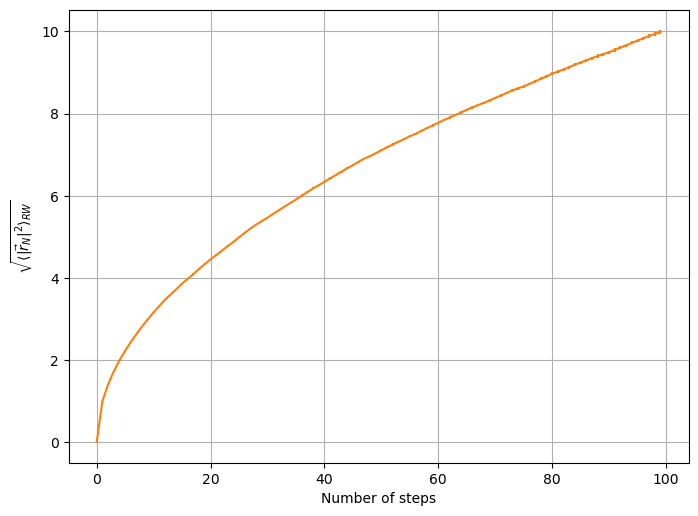

In [10]:
r_ave_cont, r_err_cont=np.loadtxt("data/ex2.2_new.dat", usecols=(2,3), dtype="float,float", unpack=True)

steps = range(100);
figure(figsize=(8, 6), dpi=100)

plt.errorbar(steps,r_ave_cont,yerr=r_err_cont, color="C1")

plt.xlabel("Number of steps")
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
plt.grid(True)
plt.show()

In the plot above we show the distance of the walker from the origin as a function of the number of steps. In particular, after $100$ steps, we get: $$\sqrt{\langle |\vec{r}_N|^2 \rangle}_{cont} = 9.99 \pm 0.04$$

Inter alia, we could try to fit both results with a function like $f(N)=k\sqrt{N}$ and demonstrate that our results indicate a diffusive behaviour. Indeed, in general we have that $\langle |\vec{r}_N|^2 \rangle = 2Dt$, where $D$ is the diffusive constant $D= \frac{a^2}{2\tau}$, $a$ is the lenght of each step and $\tau$ is the time between two consequent steps. 
In this fashion, if we consider $t=\tau N$, with $N$ number of steps of each walk, we can get $\langle |\vec{r}_N|^2 \rangle = 2Dt = \frac{a^2}{2\tau} = a^2 N$, which lead to $\sqrt{\langle |\vec{r}_N|^2 \rangle} = a\sqrt{N}$. 
So, it is clear that we can fit our results with $f(N)=k\sqrt{N}$ and understand if our random walk can be considered a diffusive process by evaluating the difference between $k$ and $a$.

Optimized parameters [a_disc, a_cont] =
[1.00471425] [1.00222963]
Parameters uncertainty =
[0.00021297] [0.00023974]


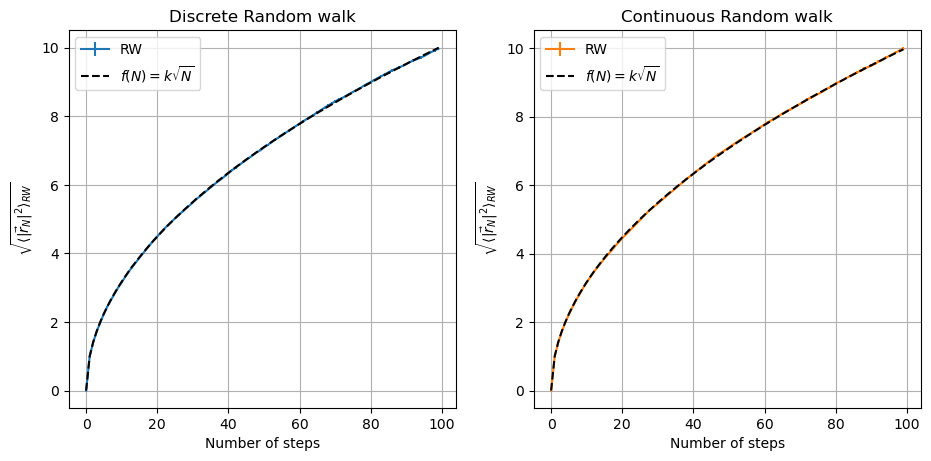

In [11]:
steps = range(100);
fig, axes = plt.subplots(1, 2,figsize=(11,5),dpi=100)

axes[0].errorbar(steps,r_ave_disc,yerr=r_err_disc, label = "RW")
axes[1].errorbar(steps,r_ave_cont,yerr=r_err_cont, color="C1", label = "RW")
axes[0].set_title("Discrete Random walk")
axes[1].set_title("Continuous Random walk")


for ax in axes:
    ax.set_xlabel("Number of steps")
    ax.set_ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$')
    ax.grid()
    
def f(x, a):  # defining the fitting function
    return a * np.sqrt(x)

p_opt_disc, p_cov_disc = curve_fit(f, steps, r_ave_disc)
p_opt_cont, p_cov_cont = curve_fit(f, steps, r_ave_cont)

print("Optimized parameters [a_disc, a_cont] =")
print(p_opt_disc, p_opt_cont)
print("Parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov_disc)), np.sqrt(np.diagonal(p_cov_cont)))

axes[0].errorbar(steps, f(steps,p_opt_disc[0]), label=r"$f(N)=k\sqrt{N}$", color="black" ,linestyle="dashed")
axes[1].errorbar(steps, f(steps,p_opt_cont[0]),label=r"$f(N)=k\sqrt{N}$", color="black", linestyle="dashed")
axes[0].legend()
axes[1].legend()
plt.show()

From these plots we can observe that the random walk is in agreement with the theory. In particular, from the fit we get $ k= 1.0047 \pm 0.0002$ for the discrete case and $ k = 1.0022 \pm 0.0002$ for the continuous case. We can conclude that the studied random walk is a diffusive process.

### Bonus: failed exercise

As a first try of this second exercise we did something wrong. Anyway, we report the result obtained. 
We misunderstood the exercise and, instead of making a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as a fucntion of the steps, we did an estimate of the distance $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ at the end of the walk, for each walk.

In [12]:
#Get information from file about the pseudo random generation
file = open("data/info_ex2.2.dat", "r")
for i in file.readlines():
    print(i)
file.close()

file = open("data/info_ex2.2.dat", "r")
file = file.read()
s = re.findall(r"[-+]?\d*\.\d+|\d+", file)

#Read data from file
data = np.loadtxt("data/ex2.2.dat")

Number of blocks: 100

Number of step per walk: 100

Number of walks per block: 100



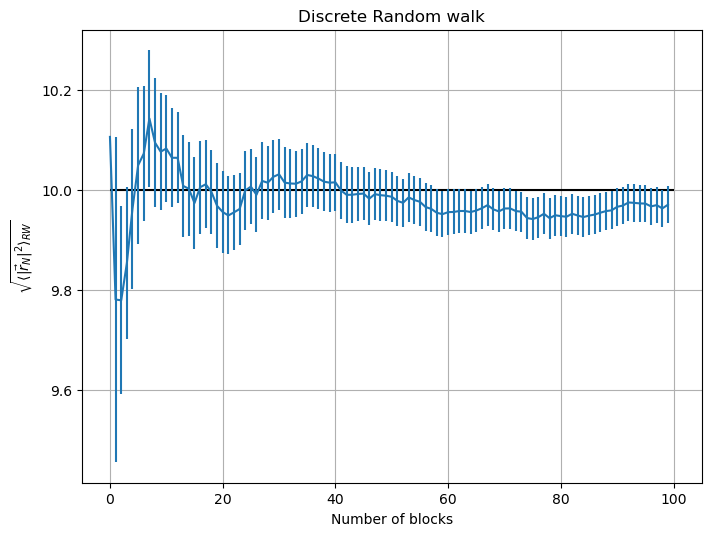

In [13]:
x = np.arange(int(s[0])) 
# build the observables, i.e. the averages on each block
y = observable(data[:,0])
          
figure(figsize=(8, 6), dpi=100)
#we highline the straight line defined by sqrt{N_steps}
plt.hlines(np.sqrt(len(steps)),0,100, color = "black")
plt.errorbar(x,y[:,0],yerr=y[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.grid(True)
plt.title("Discrete Random walk")
plt.show()

In particular, in the continuum, in order to generate randomly a direction and a verse, we resort to a sampling of $\phi \in (0,2\pi)$ and $\theta\in (0,\pi)$. The latter sampled with $\arccos(x)$, where $x$ is a random number between -1 and 1.

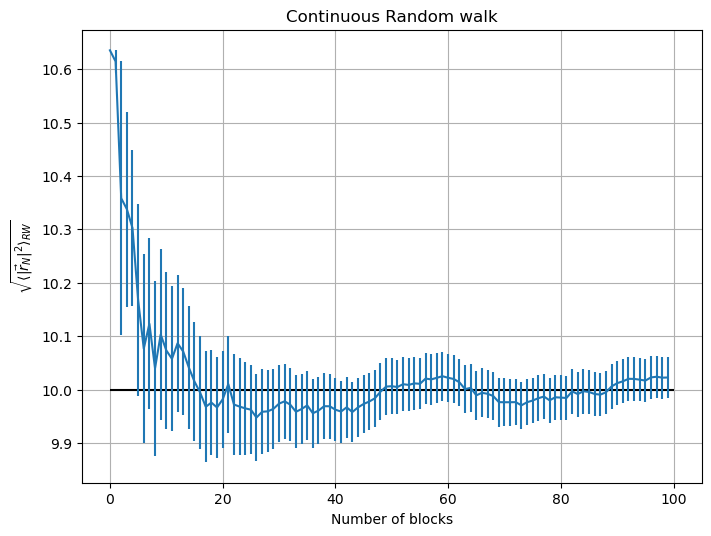

In [14]:
x = np.arange(int(s[0])) 
# build the observables, i.e. the averages on each block
y = observable(data[:,1])
          
figure(figsize=(8, 6), dpi=100)
#we highline the straight line defined by sqrt{N_steps}
plt.hlines(np.sqrt(len(steps)),0,100, color = "black")
plt.errorbar(x,y[:,0],yerr=y[:,1])
plt.xlabel("Number of blocks")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$")
plt.grid(True)
plt.title("Continuous Random walk")
plt.show()

What we obtain with this approach lead to plot which cannot be fitted with a diffusive function. This fact allowed us that there was something wrong with the code.

optimized parameters [b] =
(array([1.33298196]), array([[0.00238023]]))


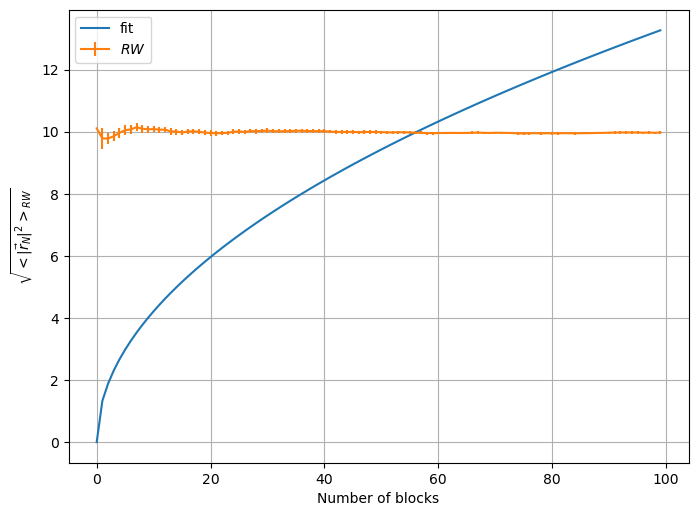

In [15]:
x = np.arange(int(s[0])) 
# build the observables, i.e. the averages on each block
y = observable(data[:,0])#in this case we work with the first column, the discrete case. In the continuum the result is the same
          
figure(figsize=(8, 6), dpi=100)

def f(x, b):  # defining the fitting function
    return b * np.sqrt(x) 

p_opt = curve_fit(f, x, y[:,0])
y_fit = f(x,p_opt[0]) 
plt.plot(x,y_fit, label="fit") # plotting fitted function

print("optimized parameters [b] =")
print(p_opt)


plt.errorbar(x,y[:,0],yerr=y[:,1], label="$RW$")
plt.xlabel("Number of blocks")
plt.ylabel(r"$\sqrt{< |\vec{r}_N|^2 >_{RW}}$")
plt.grid(True)
plt.legend()